In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../Data/data_2018-12-09.csv')
df = df.iloc[:, 1:]
df.head()

,store_id,promised delivery time,ordering time,longitude,latitude,delivery time (s),delivery time (m)
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0


In [13]:
df.shape

(1751, 7)

In [7]:
BBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())
BBox

(22.485223, 31.202911, 113.924132, 121.559605)

In [12]:
locations = list(zip(df['longitude'], df['latitude']))

In [25]:
import folium

m = folium.Map(location=[31.184317, 121.537945], zoom_start=15.5, tiles='Stamen Toner')

for l in locations:
    folium.CircleMarker(location=[l[0], l[1]], radius=1, color='red', popup=[l[0], l[1]]).add_to(m)

m


In [ ]:
south = [31.16372, 121.532229]
north = [31.202911, 121.541188]
east = [31.177209, 121.559605]
west = [31.1917, 121.517419]

In [32]:
df['ordering time'] = pd.to_datetime(df['ordering time'])
df['ordering time']

0      2018-12-09 06:30:03
1      2018-12-09 06:30:07
2      2018-12-09 06:30:09
3      2018-12-09 06:30:14
4      2018-12-09 06:30:16
               ...        
1746   2018-12-09 17:20:36
1747   2018-12-09 17:23:29
1748   2018-12-09 17:32:27
1749   2018-12-09 18:02:00
1750   2018-12-09 19:35:20
Name: ordering time, Length: 1751, dtype: datetime64[ns]

In [33]:
# time interval
df['ordering time'].min(), df['ordering time'].max()

(Timestamp('2018-12-09 06:30:03'), Timestamp('2018-12-09 21:53:54'))

In [34]:
df['order hour'] = df['ordering time'].dt.hour
df.head()

,store_id,promised delivery time,ordering time,longitude,latitude,delivery time (s),delivery time (m),order hour
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0,6
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0,6
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0,6
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0,6
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0,6


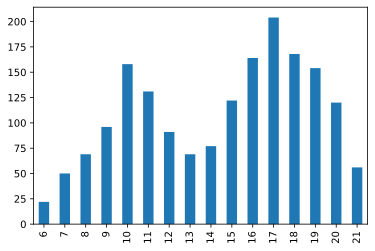

In [47]:
ax = df['order hour'].value_counts(sort=False).plot.bar()